In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab   as mlab

from matplotlib import rc
from sklearn.metrics import pairwise_distances

from scipy.spatial.distance import cdist
from scipy.special import expit
from scipy.stats import bernoulli
from numpy.polynomial.polynomial import polyval

from scipy.optimize import minimize
from scipy.stats import norm, laplace

from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

from kernel_hearding import *
from utils import *

import functools

%matplotlib inline

## Data Generation

In [2]:
# set the random seed
random.seed(2)
np.random.seed(2)

In [3]:
# number of samples
ns = 500

X0, X1, Y0, Y1 = gen_data(ns)

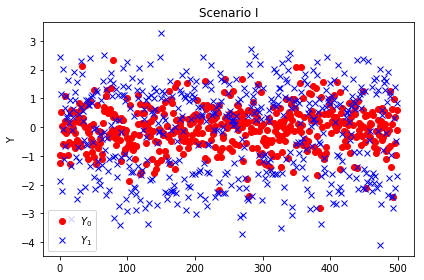

In [4]:
# plot the true functions and the samples
fig, ax = plt.subplots(1,1)

ax.plot(Y0,linewidth=1,linestyle="None",marker='o',color='red',label="Y_0")
ax.plot(Y1,linewidth=1,linestyle="None",marker='x',color='blue',label="Y_1")
ax.legend(["$Y_0$","$Y_1$"])
ax.set_title(r"Scenario I")
ax.set_ylabel(r"Y")
fig.tight_layout()

In [5]:
# save the figure
fig.savefig('cf_data.pdf',dpi=100)

/Users/fooljames/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/fooljames/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.
/Users/fooljames/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


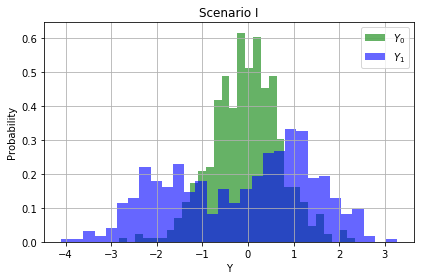

In [6]:
# plot the histograms
fig, ax = plt.subplots(1,1)
n, bins, patches = ax.hist(Y0,30,normed=1,facecolor='green', alpha=0.6, label="$Y_0$")
y0 = mlab.normpdf(bins, 0, 1)

n, bins, patches = ax.hist(Y1,30,normed=1,facecolor='blue', alpha=0.6,label="$Y_1$")
y1 = mlab.normpdf(bins, 2, 1)

ax.legend()
ax.set_title(r"Scenario I")
ax.set_ylabel(r"Probability")
ax.set_xlabel(r"Y")
ax.grid(True)

fig.tight_layout();

In [7]:
# save the figure
fig.savefig('cf_data_hist.pdf',dpi=100)

## Construct Counterfactual Mean Embedding

In [8]:
b = estimate_cme(X0,X1,Y1)

0.01
100.0


## Kernel Herding

In [9]:
Yt = np.linspace(-4,4,ns)
Yt = Yt[:,np.newaxis]
YY0 = Y0[:,np.newaxis] # Y

In [10]:
# sg = np.median(pairwise_distances(YY0,Yt,metric='euclidean'))
sg = np.median(pairwise_distances(YY0,Yt,metric='sqeuclidean'))
[yt_samples,obj_val] = generate_herding_samples(ns,YY0,sg,b)

In [11]:
yt_samples = np.array(yt_samples)

In [12]:
# yt_samples = yt_samples[np.logical_and(yt_samples > -4, (yt_samples < 4))]

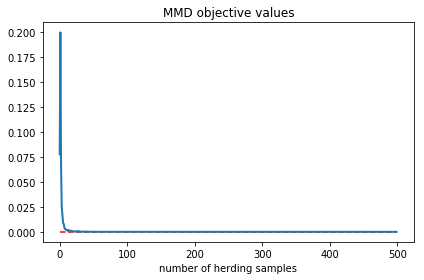

In [13]:
# plot the histograms
fig, ax = plt.subplots(1,1)
ax.plot(range(ns),obj_val,linewidth=2)

ax.set_title("MMD objective values")
ax.set_xlabel("number of herding samples")
ax.hlines(0.0, 0, ns, colors='r', linestyles='dashed')

fig.tight_layout();

In [14]:
# save the figure
fig.savefig('cf_mmd_objective.pdf', dpi=100)

In [15]:
import seaborn as sns
import pandas as pd

/Users/fooljames/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


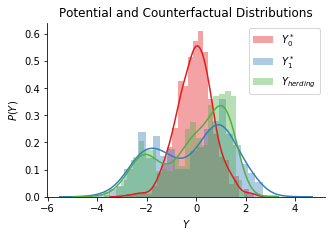

In [16]:
df_n = pd.DataFrame({'vals': np.concatenate([Y0, Y1, yt_samples]),
                     'Y': np.concatenate([np.repeat('Y_0', len(Y0)), np.repeat('Y_1', len(Y1)),
                                               np.repeat('Y_heard', len(yt_samples))])})

g = sns.FacetGrid(df_n, hue="Y", palette="Set1", height=3.4, aspect=1.4)
g = (g.map(sns.distplot, "vals", hist=True, kde=True, norm_hist=True, bins=25))

# # plot the histograms
# fig, ax = plt.subplots(1,1)
# n, bins, patches = ax.hist(Y0, 50, facecolor='green', alpha=0.6, label="$Y^*_0$")
# n, bins, patches = ax.hist(Y1, 50, facecolor='blue', alpha=0.6, label="$Y^*_1$")
# n, bins, patches = ax.hist(yt_samples, 40, facecolor='red', alpha=0.6, label="$Y_{herding}$")

g.ax.legend(["$Y^*_0$", "$Y^*_1$", "$Y_{herding}$"])
g.ax.set_title("Potential and Counterfactual Distributions")
g.ax.set_xlabel("$Y$")
g.ax.set_ylabel("$P(Y)$")

# ax.axes.set_xlim((-4, 4))
# ax.axes.set_ylim((0.0,0.15))

plt.tight_layout();

In [17]:
# save the figure
g.savefig('cf_distributions_herding.pdf', dpi=100)